In [72]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 

In [73]:
data = fetch_california_housing(as_frame =True)
df = pd.DataFrame(data.frame)
features=df.columns.tolist()
price = data.target
size = 20640
train_size = (int)(0.8*size)
test_size = size - train_size
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [74]:
original_medinc=np.array(df['MedInc'])
original_HouseAge=np.array(df['HouseAge'])
original_AveRooms=np.array(df['AveRooms'])
original_AveBedrms = np.array(df['AveBedrms'])
original_Population=np.array(df['Population'])
original_AveOccup = np.array(df['AveOccup'])
original_Latitude=np.array(df['Latitude'])
original_Longitude = np.array(df['Longitude'])
original_MedHouseVal = np.array(df['MedHouseVal'])


In [75]:
scaled_data = df.copy()
features_mean = np.zeros(9)
features_std = np.zeros(9)
i=0
for x in features:
    m = df[x].mean()
    sd = df[x].std()
    scaled_data[x] = (df[x] - m) / sd
    features_mean[i]=m
    features_std[i]=sd
    i+=1
scaled_data
price_mean = np.mean(price)
price_std = np.std(price)
scaled_price = (price-np.mean(price))/np.std(price)

In [76]:
medinc=np.array(scaled_data['MedInc'])
HouseAge=np.array(scaled_data['HouseAge'])
AveRooms=np.array(scaled_data['AveRooms'])
AveBedrms = np.array(scaled_data['AveBedrms'])
Population=np.array(scaled_data['Population'])
AveOccup = np.array(scaled_data['AveOccup'])
Latitude=np.array(scaled_data['Latitude'])
Longitude = np.array(scaled_data['Longitude'])
MedHouseVal = np.array(scaled_data['MedHouseVal'])
no_features=10

In [77]:
# training data
train_price =np.array( scaled_price[:train_size])
train_medinc=np.array(medinc[:train_size])
train_HouseAge=np.array(HouseAge[:train_size])
train_AveRooms=np.array(AveRooms[:train_size])
train_AveBedrms = np.array(AveBedrms[:train_size])
train_Population=np.array(Population[:train_size])
train_AveOccup = np.array(AveOccup[:train_size])
train_Latitude = np.array(Latitude[:train_size])
train_Longitude = np.array(Longitude[:train_size])
train_MedHouseVal = np.array(MedHouseVal[:train_size])


test_price =np.array( scaled_price[train_size:])
test_medinc=np.array(medinc[train_size:])
test_HouseAge=np.array(HouseAge[train_size:])
test_AveRooms=np.array(AveRooms[train_size:])
test_AveBedrms = np.array(AveBedrms[train_size:])
test_Population=np.array(Population[train_size:])
test_AveOccup = np.array(AveOccup[train_size:])
test_Latitude = np.array(Latitude[train_size:])
test_Longitude = np.array(Longitude[train_size:])
test_MedHouseVal = np.array(MedHouseVal[train_size:])
test_data = np.column_stack((np.ones(size-train_size),test_medinc,test_HouseAge,test_AveRooms,test_AveBedrms,test_Population,test_AveOccup,test_Latitude,test_Longitude,test_MedHouseVal))



In [78]:
one = np.ones(train_size)
x= np.column_stack((one,train_medinc,train_HouseAge,train_AveRooms,train_AveBedrms,train_Population,train_AveOccup,train_Latitude,train_Longitude,train_MedHouseVal))
x_T = x.T
dot_x_xt= x_T.dot(x)
inv = np.linalg.inv(dot_x_xt)
inv_xt = inv.dot(x_T)
cf=inv_xt.dot(train_price.T)

In [79]:
predicted_price = test_data.dot(cf)
actual_predicted_price = (predicted_price*np.std(price))+np.mean(price)

In [80]:
### calculating MSE
actual_price = np.array(price[train_size:])
error = np.zeros(test_size)
for i in range (0,test_size):
    error[i]= (actual_price[i]-actual_predicted_price[i])**2
mse = np.sum(error)/test_size

print(mse)
# rmse
rmse = math.sqrt(mse)
print(rmse)

2.0120801574446572e-28
1.4184781131355736e-14


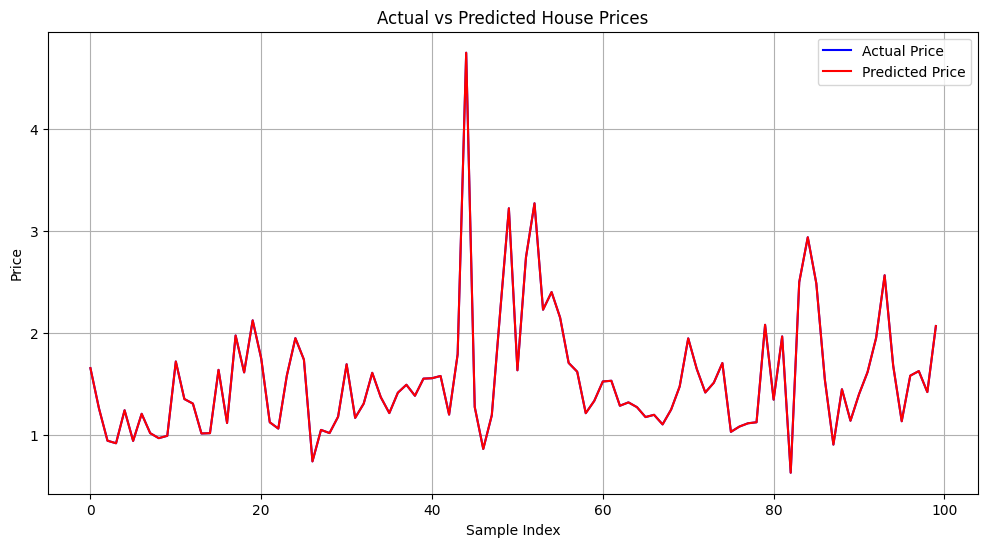

In [81]:
import matplotlib.pyplot as plt
import mplcursors

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(actual_price[:100], label='Actual Price', color='blue')
ax.plot(actual_predicted_price[:100], label='Predicted Price', color='red')
ax.set_title("Actual vs Predicted House Prices")
ax.set_xlabel("Sample Index")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)

# Add interactive cursor
mplcursors.cursor(ax.lines)

plt.show()
